In [8]:
import re
import pandas as pd

In [9]:
f = open('Chat with 7th.txt','r',encoding='utf=8')

In [10]:
data = f.read()

In [11]:
print(data)

15/03/2021, 13:09 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
22/09/2021, 09:07 - $Thejani❄: Mnd mdm qwe.mta ahune na ne
22/09/2021, 09:07 - $Thejani❄: 😕
22/09/2021, 09:07 - $Thejani❄: Assignment ek dnma submit krnnd oni
22/09/2021, 09:07 - $Malithi❄: Ow
22/09/2021, 09:07 - $Malithi❄: Quiz ekak wage
22/09/2021, 09:07 - $Malithi❄: Essay type
22/09/2021, 09:07 - $Thejani❄: 🥲shoi
22/09/2021, 09:08 - $Thejani❄: Thnk you ♥️
22/09/2021, 09:08 - $Thejani❄: 🌚
22/09/2021, 09:08 - $Malithi❄: <Media omitted>
22/09/2021, 11:17 - $Prabodha❄: data structure eka adada due wenne🥲
22/09/2021, 11:19 - $Lamali❄: E mokddd
22/09/2021, 11:20 - $Prabodha❄: tutorial 02
22/09/2021, 11:21 - $Amaya❄: Ooo
22/09/2021, 11:21 - $Lamali❄: Hutaa
22/09/2021, 11:21 - $Lamali❄: Kiytd
22/09/2021, 11:21 - $Lamali❄: Raada
22/09/2021, 11:21 - $Amaya❄: 11.59ta
22/09/2021, 11:21 - $Prabodha❄: <Media omitted>
22/09/2021, 11:21 - $L

In [12]:
 pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [13]:
messages = re.split(pattern, data)[1:]
len(messages)

20734

In [14]:
dates = re.findall(pattern, data)
dates

['15/03/2021, 13:09 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:07 - ',
 '22/09/2021, 09:08 - ',
 '22/09/2021, 09:08 - ',
 '22/09/2021, 09:08 - ',
 '22/09/2021, 11:17 - ',
 '22/09/2021, 11:19 - ',
 '22/09/2021, 11:20 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:21 - ',
 '22/09/2021, 11:22 - ',
 '22/09/2021, 11:22 - ',
 '22/09/2021, 11:36 - ',
 '23/09/2021, 21:02 - ',
 '23/09/2021, 21:02 - ',
 '23/09/2021, 21:03 - ',
 '23/09/2021, 21:03 - ',
 '23/09/2021, 21:08 - ',
 '23/09/2021, 21:08 - ',
 '23/09/2021, 21:08 - ',
 '23/09/2021, 21:14 - ',
 '23/09/2021, 22:07 - ',
 '23/09/2021, 22:58 - ',
 '23/09/2021, 23:08 - ',
 '23/09/2021, 23:17 - ',
 '24/09/2021, 13:57 - ',
 '24/09/2021, 13:57 - ',
 '24/09/2021, 13:59 - ',
 '24/09/2021, 14:03 - ',


In [15]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)
    
df.head()
    

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-03-15 13:09:00
1,$Thejani❄: Mnd mdm qwe.mta ahune na ne\n,2021-09-22 09:07:00
2,$Thejani❄: 😕\n,2021-09-22 09:07:00
3,$Thejani❄: Assignment ek dnma submit krnnd oni\n,2021-09-22 09:07:00
4,$Malithi❄: Ow\n,2021-09-22 09:07:00


In [16]:
users = []
messages = []
for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:
            users.append(entry[1])
            messages.append(entry[2])
        else:
            users.append('group_notification')
            messages.append(entry[0])
            
            
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2021-03-15 13:09:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-09-22 09:07:00,$Thejani❄,Mnd mdm qwe.mta ahune na ne\n
2,2021-09-22 09:07:00,$Thejani❄,😕\n
3,2021-09-22 09:07:00,$Thejani❄,Assignment ek dnma submit krnnd oni\n
4,2021-09-22 09:07:00,$Malithi❄,Ow\n


In [17]:
df.shape


(20734, 3)

In [18]:
df['year'] = df['date'].dt.year

In [19]:
df.head


<bound method NDFrame.head of                      date                user  \
0     2021-03-15 13:09:00  group_notification   
1     2021-09-22 09:07:00           $Thejani❄   
2     2021-09-22 09:07:00           $Thejani❄   
3     2021-09-22 09:07:00           $Thejani❄   
4     2021-09-22 09:07:00           $Malithi❄   
...                   ...                 ...   
20729 2023-02-09 21:45:00           $Malithi❄   
20730 2023-02-09 21:48:00          $Prabodha❄   
20731 2023-02-09 22:29:00           $Malithi❄   
20732 2023-02-15 08:58:00          $Prabodha❄   
20733 2023-02-15 08:58:00          $Prabodha❄   

                                                 message  year  
0      Messages and calls are end-to-end encrypted. N...  2021  
1                          Mnd mdm qwe.mta ahune na ne\n  2021  
2                                                    😕\n  2021  
3                  Assignment ek dnma submit krnnd oni\n  2021  
4                                                   Ow\n

In [20]:
df['year'] = df['date'].dt.year

In [21]:
df['month'] = df['date'].dt.month_name()

In [22]:
df['day'] = df['date'].dt.day

In [23]:
df['hour'] = df['date'].dt.hour

In [24]:
df['minute'] = df['date'].dt.minute


In [25]:
df.head


<bound method NDFrame.head of                      date                user  \
0     2021-03-15 13:09:00  group_notification   
1     2021-09-22 09:07:00           $Thejani❄   
2     2021-09-22 09:07:00           $Thejani❄   
3     2021-09-22 09:07:00           $Thejani❄   
4     2021-09-22 09:07:00           $Malithi❄   
...                   ...                 ...   
20729 2023-02-09 21:45:00           $Malithi❄   
20730 2023-02-09 21:48:00          $Prabodha❄   
20731 2023-02-09 22:29:00           $Malithi❄   
20732 2023-02-15 08:58:00          $Prabodha❄   
20733 2023-02-15 08:58:00          $Prabodha❄   

                                                 message  year      month  \
0      Messages and calls are end-to-end encrypted. N...  2021      March   
1                          Mnd mdm qwe.mta ahune na ne\n  2021  September   
2                                                    😕\n  2021  September   
3                  Assignment ek dnma submit krnnd oni\n  2021  September

In [26]:
df[df['user'] == '$Thejani❄'].shape

(1558, 8)

In [27]:
words =[]
for message in df['message']:
    words.extend(message.split())

In [28]:
len(words)

75067

In [32]:
df

,date,user,message,year,month,day,hour,minute
0,2021-03-15 13:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,March,15,13,9
1,2021-09-22 09:07:00,$Thejani❄,Mnd mdm qwe.mta ahune na ne\n,2021,September,22,9,7
2,2021-09-22 09:07:00,$Thejani❄,😕\n,2021,September,22,9,7
3,2021-09-22 09:07:00,$Thejani❄,Assignment ek dnma submit krnnd oni\n,2021,September,22,9,7
4,2021-09-22 09:07:00,$Malithi❄,Ow\n,2021,September,22,9,7
...,...,...,...,...,...,...,...,...
20729,2023-02-09 21:45:00,$Malithi❄,Mt heta bane\n,2023,February,9,21,45
20730,2023-02-09 21:48:00,$Prabodha❄,Ai e😏\n,2023,February,9,21,48
20731,2023-02-09 22:29:00,$Malithi❄,Mn heta ammalage game ynawa\n,2023,February,9,22,29
20732,2023-02-15 08:58:00,$Prabodha❄,Me oyala kata hri appendicitis hadila thiyenaw...,2023,February,15,8,58


In [35]:
df[df['message'] == '<Medeia omitted>\n'].shape[0]


0

In [36]:

print(df)

                     date                user  \
0     2021-03-15 13:09:00  group_notification   
1     2021-09-22 09:07:00           $Thejani❄   
2     2021-09-22 09:07:00           $Thejani❄   
3     2021-09-22 09:07:00           $Thejani❄   
4     2021-09-22 09:07:00           $Malithi❄   
...                   ...                 ...   
20729 2023-02-09 21:45:00           $Malithi❄   
20730 2023-02-09 21:48:00          $Prabodha❄   
20731 2023-02-09 22:29:00           $Malithi❄   
20732 2023-02-15 08:58:00          $Prabodha❄   
20733 2023-02-15 08:58:00          $Prabodha❄   

                                                 message  year      month  \
0      Messages and calls are end-to-end encrypted. N...  2021      March   
1                          Mnd mdm qwe.mta ahune na ne\n  2021  September   
2                                                    😕\n  2021  September   
3                  Assignment ek dnma submit krnnd oni\n  2021  September   
4                         

In [41]:
!pip install urlextract


Defaulting to user installation because normal site-packages is not writeable


In [44]:
from urlextract import URLExtract 

extractor = URLExtract()
urls = extractor.find-urls("Let's stackoverflow.com as an example google.com, http://faceboock.com, ftp//url.in .")
urls


ModuleNotFoundError: No module named 'urlextract'

In [45]:
y = []
for messages in df ['message']:
    y.extend(extractor.find_urls(message))

NameError: name 'extractor' is not defined

In [40]:
len(y)

NameError: name 'y' is not defined

In [46]:
df


,date,user,message,year,month,day,hour,minute
0,2021-03-15 13:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,March,15,13,9
1,2021-09-22 09:07:00,$Thejani❄,Mnd mdm qwe.mta ahune na ne\n,2021,September,22,9,7
2,2021-09-22 09:07:00,$Thejani❄,😕\n,2021,September,22,9,7
3,2021-09-22 09:07:00,$Thejani❄,Assignment ek dnma submit krnnd oni\n,2021,September,22,9,7
4,2021-09-22 09:07:00,$Malithi❄,Ow\n,2021,September,22,9,7
...,...,...,...,...,...,...,...,...
20729,2023-02-09 21:45:00,$Malithi❄,Mt heta bane\n,2023,February,9,21,45
20730,2023-02-09 21:48:00,$Prabodha❄,Ai e😏\n,2023,February,9,21,48
20731,2023-02-09 22:29:00,$Malithi❄,Mn heta ammalage game ynawa\n,2023,February,9,22,29
20732,2023-02-15 08:58:00,$Prabodha❄,Me oyala kata hri appendicitis hadila thiyenaw...,2023,February,15,8,58


In [48]:
df['user'].value_counts().head


<bound method NDFrame.head of $Prabodha❄             4984
$Ashani Akka❄          3304
$Awandya❄              2813
$Lamali❄               2377
$Malithi❄              2364
$Thejani❄              1558
$Amaya❄                1484
Dewmini Rathnayake🌼     952
$Hirunika❄              276
+94 75 638 0280         198
$Sawani Akka❄           160
Remona Nn❄              135
$Sandali❄                73
$Sandali N❄              28
$Remona N❄               16
group_notification       12
Name: user, dtype: int64>

In [54]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [59]:
x = df['user'].value_counts().head()

In [60]:
import matplotlib.pyplot as plt

In [61]:
name =x.index
count = x.values

<BarContainer object of 5 artists>

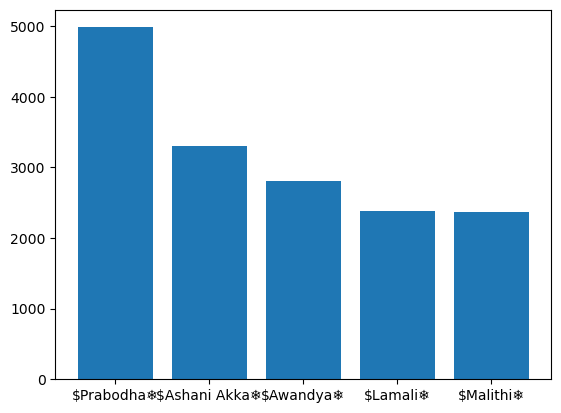

In [64]:
plt.bar(name,count)


In [68]:
round((df['user'].value_counts()/df.shape[0])*100,2,).reset_index().rename

<bound method DataFrame.rename of                   index   user
0            $Prabodha❄  24.04
1         $Ashani Akka❄  15.94
2             $Awandya❄  13.57
3              $Lamali❄  11.46
4             $Malithi❄  11.40
5             $Thejani❄   7.51
6               $Amaya❄   7.16
7   Dewmini Rathnayake🌼   4.59
8            $Hirunika❄   1.33
9       +94 75 638 0280   0.95
10        $Sawani Akka❄   0.77
11           Remona Nn❄   0.65
12            $Sandali❄   0.35
13          $Sandali N❄   0.14
14           $Remona N❄   0.08
15   group_notification   0.06>

In [75]:
words =[]
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

Mnd mdm qwe.mta ahune na ne

😕

Assignment ek dnma submit krnnd oni

Ow

Quiz ekak wage

Essay type

🥲shoi

Thnk you ♥️

🌚

<Media omitted>

data structure eka adada due wenne🥲

E mokddd

tutorial 02

Ooo

Hutaa

Kiytd

Raada

11.59ta

<Media omitted>

Raane

Ooo

na🌚

<Media omitted>

Me kavuda repeat valata payment kale..

Ara mulin evapu form eka neda fill karanna one ethakota..

<Media omitted>

Meka module repeat valatane thiyenne.. Ethakota end vitharak danavanm eth mekatada danna one..

Ane mnda mama thama pay kre na

🥲

Kalinnm karala thiyenawa mataka na

😬😬😬

මන් කලා

Mekada fill kale..

ඕ

Aaa.. Hariyoo.. Thank you..

Ayeth letter ekk danna mail ekk awada kata hri

🙄

Oo

<Media omitted>

Me

Imran sirge module repeat kawda danne

Sirge module nmbr ek mthkada🥲 thm mge lms eke ek nne..

EEE204 da khd mata hariyatama mathaka na akka

Hmm🥲


In [80]:
!pip install collection

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from collections import counter
counter(words).most_common(20)

ImportError: cannot import name 'counter' from 'collections' (C:\ProgramData\Anaconda3\lib\collections\__init__.py)

In [82]:
plt.plot(timeline['time'],timeline['message'])
plt.xtricks(rotraction='vertical' )
plt.show()

NameError: name 'timeline' is not defined

In [83]:
df['only_date'] = df['date'].dt.date

In [85]:
df.groupby('only_date').count()['message'].reset_index()

,only_date,message
0,2021-03-15,1
1,2021-09-22,23
2,2021-09-23,12
3,2021-09-24,9
4,2021-09-25,106
...,...,...
308,2023-01-11,10
309,2023-01-13,8
310,2023-01-16,3
311,2023-02-09,52


In [89]:
plt.figure(figsize=(18),10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

SyntaxError: positional argument follows keyword argument (3802242803.py, line 1)

In [91]:
import seaborn as sns 
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(ritation='horizonatal')
plt.show()

KeyError: 'period'

<Figure size 2000x600 with 0 Axes>